In [60]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
season = ["2010-2011","2011-2012", "2012-2013", "2013-2014", "2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", "2020-2021", "2021-2022", "2022-2023", "2023-2024"]
headers = {'Accept': '/', 'Connection': 'keep-alive', 'User-Agent': 'Mozilla/5.0 (Windows NT 6.0) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/70.0.3538.110 Safari/537.36', 'Accept-Language':'en-US;q=0.5,en;q=0.3', 'Cache-Control': 'max-age=0', 'Upgrade-Insecure-Requests': '1'}

In [21]:
url_ranking = "https://www.eurosport.com/football/premier-league/2012-2013/standings.shtml"
url_value = 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2023'


In [22]:
def get_table(headers, url, table_class, season):
    p = requests.get(url, headers = headers) 
    print(p.status_code)
    page = p.content
    soup = BeautifulSoup(page,"html.parser")
    rows = soup.find('table', {'class': table_class}).find('tbody').find_all('tr')
    data = []
    for row in rows:
        td = [cell.get_text(strip=True) for cell in row]
        td = [val for val in td if val]
        data.append(td + [season])
    df = pd.DataFrame(data)
    return df

Original code. Did not want to remove without consensus. 
```python
def get_table(season, headers):
    p = requests.get(f"https://www.eurosport.com/football/premier-league/{season}/standings.shtml", headers = headers) 
    print(p.status_code)
    page = p.content
    soup = BeautifulSoup(page,"html.parser")
    rows = soup.find_all("tr",{"data-testid":"table-row-data"})
    data = []
    for row in rows:
        team_rank = row.find("td",{"data-testid":"table-cell-value"}).text.strip()
        team_name = row.find("td",{"data-testid":"table-cell-team"}).text.strip()
        team_data = row.find_all("td",{"data-testid":"table-cell-value"})
        td = [cell.get_text(strip = True) for cell in team_data]
        data.append([team_rank]+[team_name[:-3]]+td+[season])
    df = pd.DataFrame(data)
    return df
    

get_table("2017-2018")
´´´

In [23]:
table_class_ranking = 'w-full table-auto overflow-hidden border-b border-br-2-80'
full_table = get_table(headers, f"https://www.eurosport.com/football/premier-league/2010-2011/standings.shtml", table_class_ranking, '2010-2011')
for i in season[1:]:
    print(i)
    df = get_table(headers, f"https://www.eurosport.com/football/premier-league/{i}/standings.shtml", table_class_ranking,i)
    full_table = pd.concat([full_table,df])

full_table

200
2011-2012
200
2012-2013
200
2013-2014
200
2014-2015
200
2015-2016
200
2016-2017
200
2017-2018
200
2018-2019
200
2019-2020
200
2020-2021
200
2021-2022
200
2022-2023
200
2023-2024
200


,0,1,2,3,4,5,6,7,8,9,10
0,1,Manchester UnitedMUN,38,23,11,4,78,37,41,80,2010-2011
1,2,ChelseaCHE,38,21,8,9,69,33,36,71,2010-2011
2,3,Manchester CityMCI,38,21,8,9,60,33,27,71,2010-2011
3,4,ArsenalARS,38,19,11,8,72,43,29,68,2010-2011
4,5,Tottenham HotspurTOT,38,16,14,8,55,46,9,62,2010-2011
...,...,...,...,...,...,...,...,...,...,...,...
15,16,BrentfordBRE,38,10,9,19,56,65,-9,39,2023-2024
16,17,Nottingham ForestNOT,38,9,9,20,49,67,-18,32,2023-2024
17,18,Luton TownLUT,38,6,8,24,52,85,-33,26,2023-2024
18,19,BurnleyBUR,38,5,9,24,41,78,-37,24,2023-2024


In [24]:
# saison_id=2023 means season 23/24
s = 2011
table_class_value = 'items'
market_table = get_table(headers, 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id=2010', table_class_value, '2010-2011')
for i in season[1:]:
    print(s)
    df = get_table(headers, 'https://www.transfermarkt.com/premier-league/startseite/wettbewerb/GB1/plus/?saison_id={}'.format(s), 'items',i)
    market_table = pd.concat([market_table,df])
    s += 1

market_table

200
2011
200
2012
200
2013
200
2014
200
2015
200
2016
200
2017
200
2018
200
2019
200
2020
200
2021
200
2022
200
2023
200


,0,1,2,3,4,5,6
0,Chelsea FC,33,25.9,23,€12.85m,€424.10m,2010-2011
1,Manchester City,45,24.9,28,€8.98m,€404.18m,2010-2011
2,Manchester United,43,25.7,29,€9.02m,€388.00m,2010-2011
3,Liverpool FC,42,24.9,25,€8.08m,€339.20m,2010-2011
4,Arsenal FC,34,24.8,27,€9.53m,€324.00m,2010-2011
...,...,...,...,...,...,...,...
15,Everton FC,34,26.8,16,€11.52m,€391.75m,2023-2024
16,Fulham FC,35,26.9,31,€10.98m,€384.35m,2023-2024
17,Burnley FC,39,25.3,30,€7.01m,€273.48m,2023-2024
18,Sheffield United,45,24.7,26,€3.39m,€152.45m,2023-2024


From here we need to merge the important info from this table into the other via matching club names and season

In [25]:
#removing FC
def clean_market_club_name(club_name):
    return club_name.replace("FC", "").strip()

#removing MUN, CUH etc..
def clean_full_club_name(club_name):
    return club_name[:-3].strip()

#applying above functions
full_table[1] = full_table[1].apply(clean_full_club_name)
market_table[0] = market_table[0].apply(clean_market_club_name)

#renaming  columns
full_table.columns = ['Position', 'Club', 'P', 'W', 'D', 'L', 'GF', 'GA', '(+/-)', 'PTS', 'Season']
market_table.columns = ['Club', '#Players', 'avg_age', 'Foreigners', 'Market Value', 'Total Market Value(Million €)', 'Season']

print(full_table)
print(market_table)


   Position               Club   P   W   D   L  GF   GA (+/-) PTS     Season
0         1  Manchester United  38  23  11   4  78   37    41  80  2010-2011
1         2            Chelsea  38  21   8   9  69   33    36  71  2010-2011
2         3    Manchester City  38  21   8   9  60   33    27  71  2010-2011
3         4            Arsenal  38  19  11   8  72   43    29  68  2010-2011
4         5  Tottenham Hotspur  38  16  14   8  55   46     9  62  2010-2011
..      ...                ...  ..  ..  ..  ..  ..  ...   ...  ..        ...
15       16          Brentford  38  10   9  19  56   65    -9  39  2023-2024
16       17  Nottingham Forest  38   9   9  20  49   67   -18  32  2023-2024
17       18         Luton Town  38   6   8  24  52   85   -33  26  2023-2024
18       19            Burnley  38   5   9  24  41   78   -37  24  2023-2024
19       20   Sheffield United  38   3   7  28  35  104   -69  16  2023-2024

[280 rows x 11 columns]
                 Club #Players avg_age Foreigners M

In [56]:
df = pd.merge(full_table, market_table, how='left', left_on = ['Club','Season'], right_on=['Club', 'Season'])
df = df.drop('Market Value', axis = 1)
print(df.shape)
df = df.dropna()

(280, 15)


In [57]:
print(df.shape)


(266, 15)


Lost a few rows that were missing values. 

In [69]:
df.dtypes

Position              object
Club                  object
P                     object
W                     object
D                     object
L                     object
GF                    object
GA                    object
(+/-)                 object
PTS                   object
Season                object
#Players              object
avg_age               object
Foreigners            object
Total Market Value    object
dtype: object

In [81]:
df['PTS'] = df['PTS'].astype(int)
df['#Players'] = df['#Players'].astype(int)
df['avg_age'] = df['avg_age'].astype(float)

df['Total Market Value'] = df['Total Market Value'].apply(lambda x: float(x[1:-1]) if x[-1] == 'm' else float(x[1:-2])*1000)

In [82]:
df.dtypes

Position               object
Club                   object
P                      object
W                      object
D                      object
L                      object
GF                     object
GA                     object
(+/-)                  object
PTS                     int64
Season                 object
#Players                int64
avg_age               float64
Foreigners             object
Total Market Value    float64
dtype: object

In [83]:
data_2024 = df[df['Season'] == '2023-2024']
data_2024

,Position,Club,P,W,D,L,GF,GA,(+/-),PTS,Season,#Players,avg_age,Foreigners,Total Market Value
260,1,Manchester City,38,28,7,3,96,34,62,91,2023-2024,36,25.7,21,1460.00
261,2,Arsenal,38,28,5,5,91,29,62,89,2023-2024,40,24.6,23,1200.00
262,3,Liverpool,38,24,10,4,86,41,45,82,2023-2024,45,24.2,30,955.85
263,4,Aston Villa,38,20,8,10,76,61,15,68,2023-2024,45,25.0,23,709.90
264,5,Tottenham Hotspur,38,20,6,12,74,61,13,66,2023-2024,41,25.6,27,838.50
265,6,Chelsea,38,18,9,11,77,63,14,63,2023-2024,56,22.2,26,1010.00
266,7,Newcastle United,38,18,6,14,85,62,23,60,2023-2024,45,26.3,20,652.65
267,8,Manchester United,38,18,6,14,57,58,-1,60,2023-2024,46,24.9,27,808.75
268,9,West Ham United,38,14,10,14,60,74,-14,52,2023-2024,36,26.6,19,487.50
269,10,Crystal Palace,38,13,10,15,57,58,-1,49,2023-2024,40,25.1,17,446.78


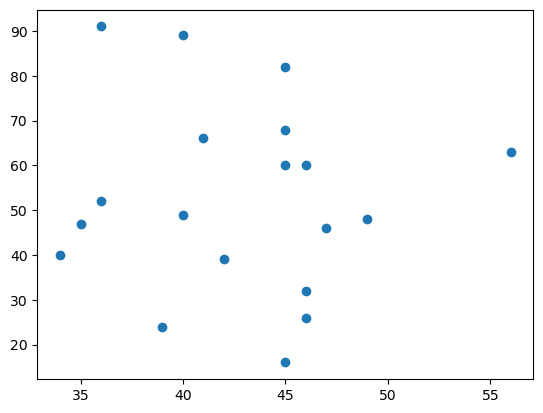

In [73]:
plt.scatter(data_2024['#Players'], data_2024['PTS'])

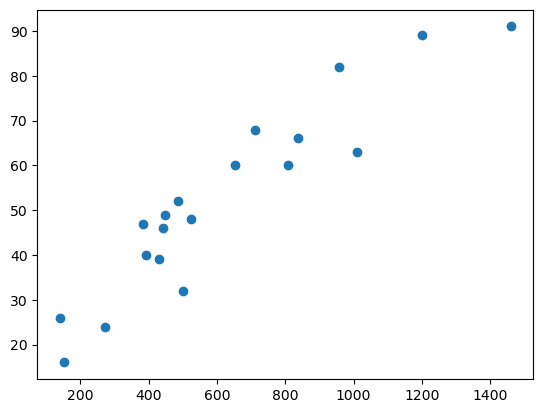

In [85]:
plt.scatter(data_2024['Total Market Value'], data_2024['PTS'])

Very clear connection between market value of a team and the points.